# Часть 2.

## Задание 1.

Для работы с векторами используем библиотеку *numpy*.

In [32]:
import numpy as np

Определяем функцию и делаем простую проверку на корректность:

In [3]:
f = lambda x, w, b: np.dot(w, x) + b

f(np.array([1, 2, 3]), np.array([4, 5, 6]), 1)

33

## Задание 2

Для рисования графиков используем библиотеку *pyplot*.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
# картинки будут появляться прямо в тексте 
# will lead to static images of your plot embedded in the notebook

Определяем пространство x-ов и определяем значения функций *f* и *g* в заданных точках. 

In [9]:
x = np.linspace(-5, 5, 100) # Вернет 100 чисел на одинаковом расстоянии друг от друга на интервале [-5, 5]
# Returns 100 evenly spaced numbers over the interval [-5, 5]
f = x - x**3 / 6 + x**5 / 120 - x**7/5040
g = np.sin(x)

Создаем график и выставляем оси координат.
*Axis.spines* это линии задающие границы области графика. По умолчанию они образуют прямоугольник вокруг графика. Мы сдвинем левую и нижнюю в центр и скроем правую и верхнюю, чтобы обозначить оси *x* и *y*.

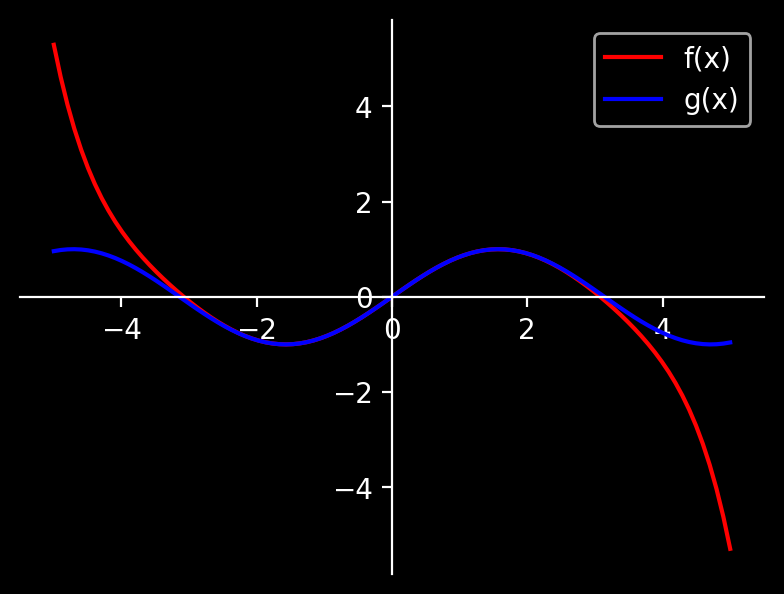

In [13]:
fig, ax = plt.subplots(1) # Creates a grid of plots, ax will be an array of a single Axes object. 

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(x, f, 'r', label='f(x)')
plt.plot(x, g, 'b', label='g(x)')
plt.legend(loc='upper right')

## Задание 3.

Выполним это задание двумя способами:
* метод *pyplot.Circle*.
* Параметрическое уравнение окружности: $x=\sin \alpha $, $y=\cos \alpha$ для $\alpha \in [0,2\pi)$

In [2]:
radius = 2.0

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Выставим границы и уравняем масштаб осей
for ax in (ax1, ax2):
    ax.set_aspect('equal') 
    ax.set_xlim((-radius - 1, radius + 1))
    ax.set_ylim((-radius - 1, radius + 1))

# На первом графике нарисуем, используя средства pyplot    
circle = plt.Circle((0.0 , 0.0), radius, fill=False) 
ax1.add_patch(circle) 
fig.suptitle(f'Circle with radius={radius}') 

# На втором графике нарисуем, используя параметрическое уравнение окружности
angle = np.linspace(0 , 2 * np.pi , 100)  # аналогично x-ам из задания 2, зададим углы от 0 до 360 градусов
x = radius * np.cos(angle) 
y = radius * np.sin(angle) 
  
ax2.plot(x, y, color='w') 

NameError: name 'plt' is not defined

## Задание 4.

Определим функцию, которая применяет преобразование при помощи матрицы к точкам. Для примера рассмотрим одну точку. Чтобы применить к ней преобразование нужно, по определению, умножить матрицу на точку (точка должна быть задана стобцом, т.е. матрицей размерности $1 \times 2$). Мы передаем точку как строку (матрица размерности $2 \times 1$), значит нам необходимо ее транспонировать (points.T). В результате получается столбец, поэтому результат тоже нужно транспонировать (np.transpose). 

Рассуждения выше верны и для набора из $n$ точек (матрица размером $n \times 2$)
TODO: расписать нормально 
, так как по определению, $[i,j]$ элемент результа умножения двух матриц, равен скалярному произведению $i$-ый столбца первой матрицы и $j$-ого столбца второй матрицы. Таким образом, умножая $i$-ый столбец (т.е. $i$-ую точку) мы получим результат преобразования.

In [128]:
def transform_points(points, matrix):
    return np.transpose(np.dot(matrix, points.T))

Теперь определим функцию, которая применит преобразование к точкам и нарисует их на графике. Чтобы было понятно, какая точка перешла в какую, будем помечать начальную и конечную точку одинаковыми цветами. Для генерации массива цветов используем библиотеку `matplotlib.cm`. 

Чтобы отличать начальные и конечные точки, будем рисовать их на графике разными символами - $\times$ для начальных точек и $+$ для точек после преобразования.

In [129]:
import matplotlib.cm as cm

def transformation_plot(points, matrix): 
    fig, axes = plt.subplots(1)
    axes.set_aspect('equal')
    
    # Генерируем массив цветов такого же размера как и points
    colors = cm.rainbow(np.linspace(0, 1, len(points)))
    
    transformed = transform_points(points, matrix)
    axes.scatter(points[:,0], points[:,1],color=colors, marker='x')
    axes.scatter(transformed[:,0], transformed[:,1], color=colors, marker='+')

Протестируем функцию на нескольких матрицах преобразования. Для этого зададим набор точек.

In [53]:
points = np.array([[0, 0], [2, 1], [3, 2], [4, 5], [4, 4], [0, 4], [5, 0]])

Единичная матрица (нет преобразования): 
$[[1, 0], [0, 1]]$. На графике должно быть видно, что `+` и `+` накладываются друг на друга.

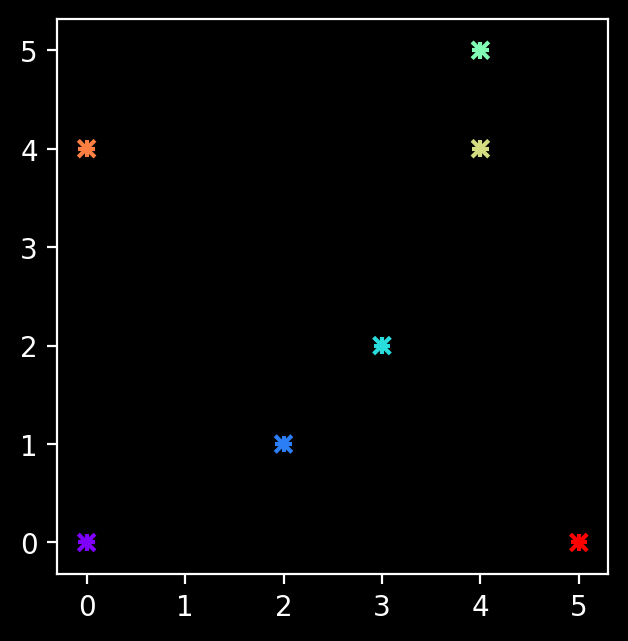

In [54]:
id_matrix = np.array([[1, 0],[0, 1]])
transformation_plot(points, id_matrix)

 Матрица масштабирования (растягивает в `a` раз по `x`-координате, в `b` раз по `y`-координате): $[[a, 0],[0, b]]$.

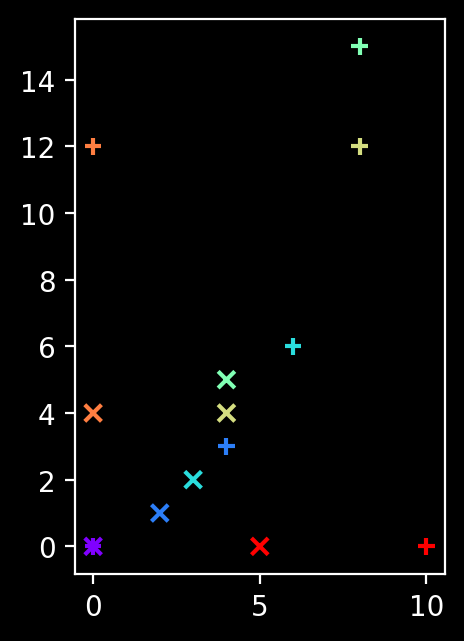

In [133]:
stretch_matrix = np.array([[2, 0],[0, 3]])
transformation_plot(points, stretch_matrix)

* Матрица поворота на угол $\theta$ по часовой стрелке: $[[\cos \theta, \sin \theta], [-\sin \theta, \cos \theta]]$ 

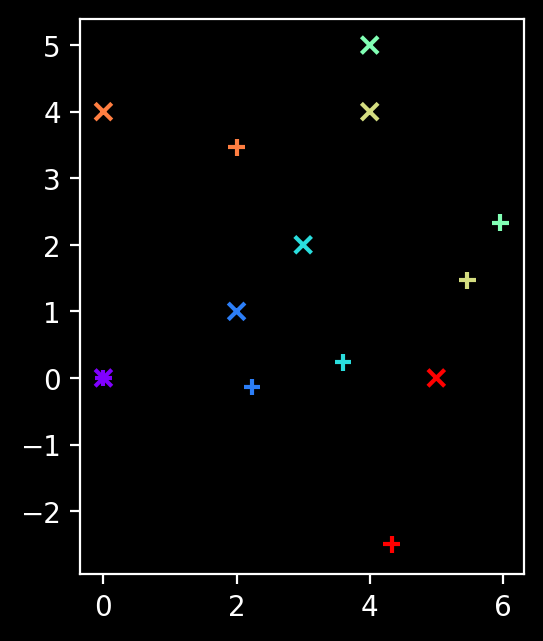

In [134]:
theta = np.pi / 6 # 30 градусов
rotation_matrix = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
transformation_plot(points, rotation_matrix)

## Задание 5.

Определим функцию, которая считает значение производной в заданной точке по определению: $f'(x) = \frac{f(x) - f(x + \Delta x)}{\Delta x}$ при $\Delta x -> 0$

In [9]:
def my_derivative(f, x_vec): 
    # Выберем какое-то маленькое значение
    delta = 1e-4
    # np.vectorize превращает функцию, работающую с числами, в функцию, работающую с векторами
    derivative = np.vectorize(lambda x: (f(x + delta) - f(x)) / delta)
    return derivative(x_vec)

В качестве альтернативы, можно использовать стандартную функцию `derivative` из библиотеки `scipy.misc`.

In [20]:
from scipy.misc import derivative

Напишем функцию, которая отрисует выбранную функцию на заданном интервале вместе с ее производной:

In [76]:
def derivative_plot(f, f_derivative, left, right):
    x = np.linspace(left, right, 100)
    fig, axes = plt.subplots(3, 1, figsize=(10,10))

    # Рисуем функцию f на всех графиках 
    for ax in axes:
        ax.plot(x, f(x), 'r', label='f(x)')
        ax.set_aspect('equal')
    
    # Рисуем аналитическое значение производной на 1 графике
    axes[0].plot(x, f_derivative(x), color='b', label='f\'(x)')
    axes[0].set_title('Аналитическое значение производной')
    
    axes[1].plot(x, derivative(f, x, dx=0.0001), color='b', label='f\'(x)')
    axes[1].set_title('scipy.misc.derivative')
    
    axes[2].plot(x, my_derivative(f, x), color='b', label='f\'(x),my_derivative')
    axes[2].set_title('Численное значение производной')
    
    fig.tight_layout()

Проверим на нескольких функциях:

Функция $X^2 + 2x + 1$, ее производная $2x + 2$

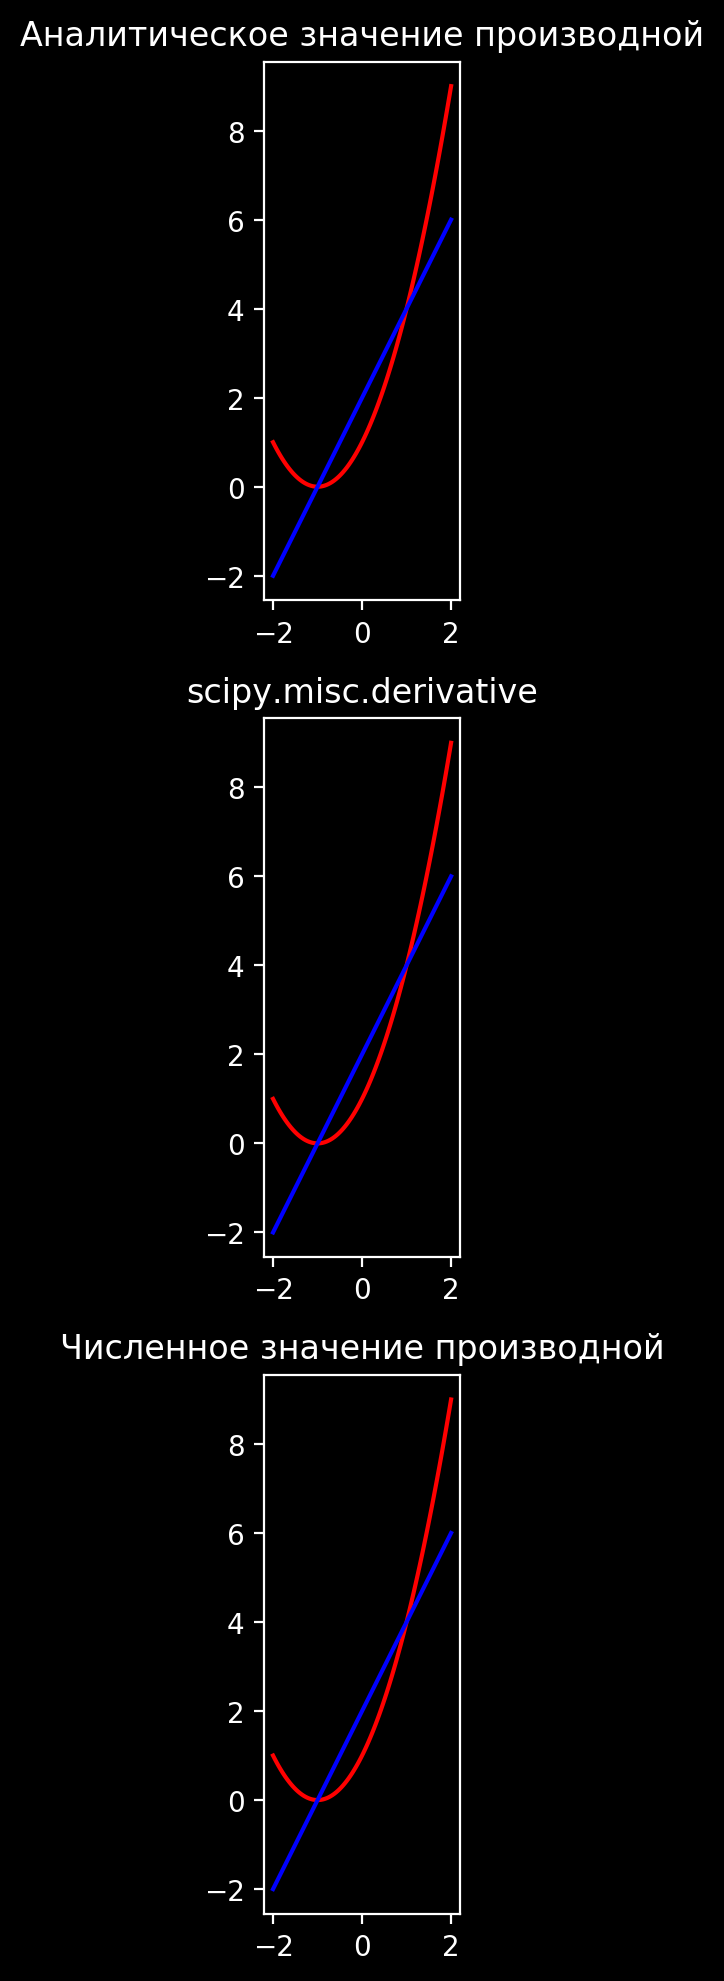

In [78]:
derivative_plot(lambda x: x**2 + 2*x + 1, lambda x: 2*x + 2, -2, 2)

$\ln x$, производная $\frac{1}{x}$. Строим от $0.1$, так как в $0$, производная не определена.

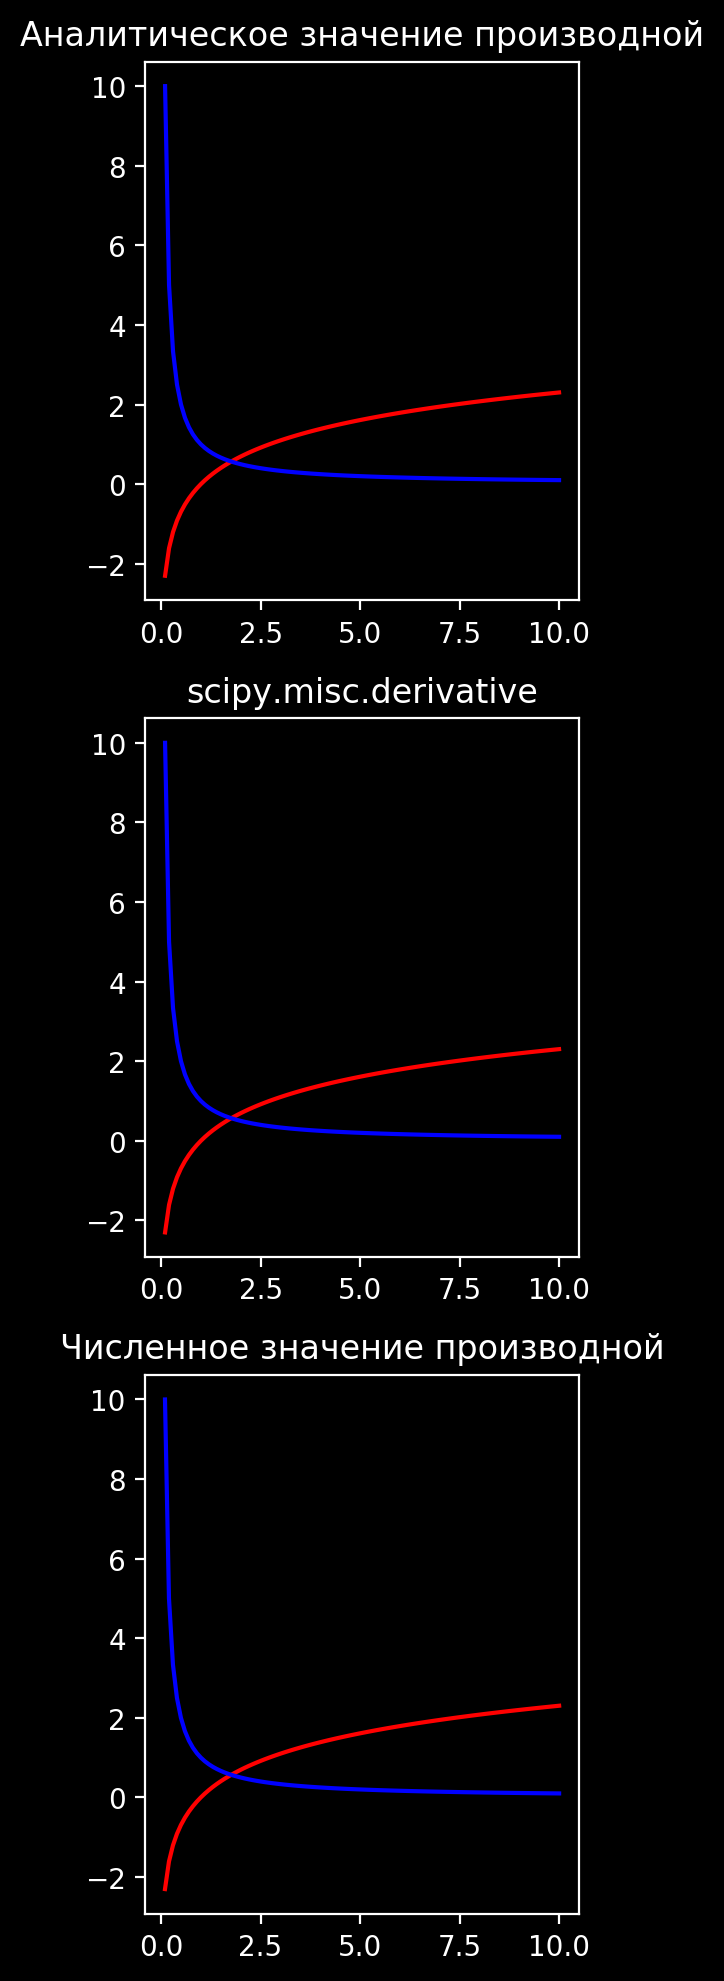

In [79]:
derivative_plot(lambda x: np.log(x), lambda x: 1.0 / x, 0.1, 10)

$\sin x$, производная равна $\cos x$

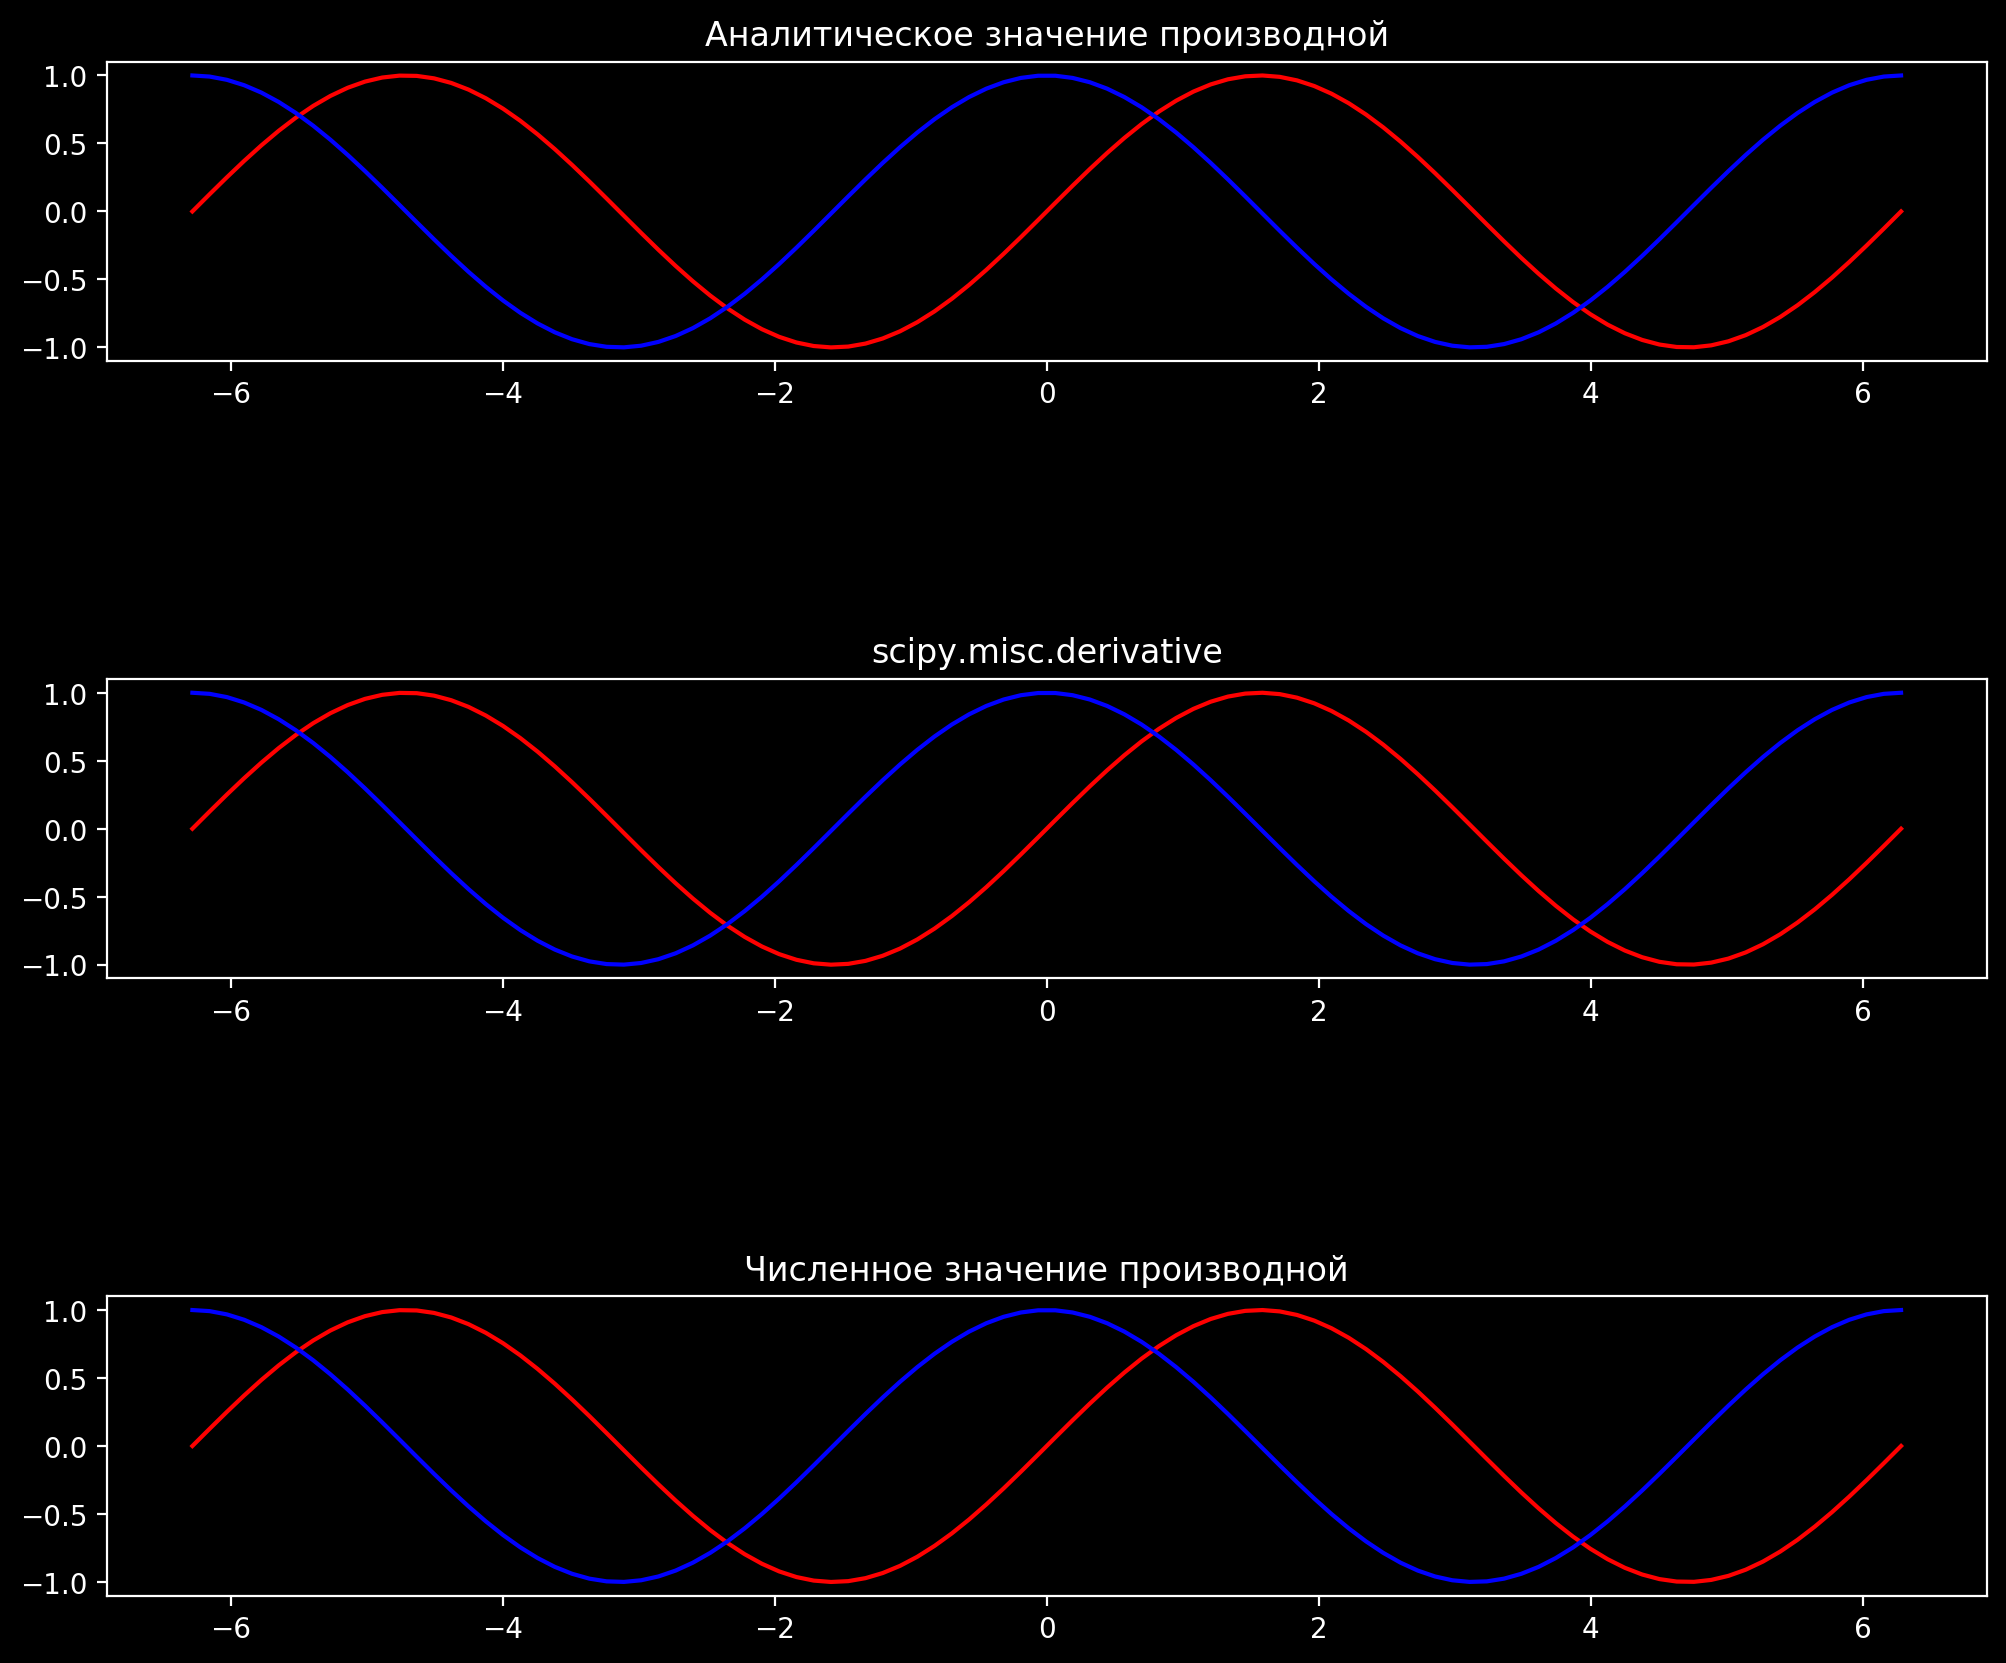

In [80]:
derivative_plot(lambda x: np.sin(x), lambda x: np.cos(x), -2 * np.pi, 2 * np.pi)

Часть 2. Задание 6.

In [ ]:
import numpy as np

rad30 = 0.523599
rad90 = 1.5708
angle = lambda u,v: np.arccos(np.dot(u, v))


# return proportion of vectors where predicate is true
def find_proportion(listOfVectors, predicate):
    return sum(map(predicate, listOfVectors))

less_that_30 = lambda u, q: angle(u, q) < rad30
less_than_90 = lambda u, q: angle()


# Часть 3

# Задание 1

Определим функцию для подсчета Евклидова расстояния между двумя точками.

In [3]:
import math

def distance(x1, y1, x2, y2):
    return math.sqrt((float(x1) - float(x2)) ** 2 + (float(y1) - float(y2)) ** 2)

На основе этой функции определим функцию для подсчета суммарного расстояния решения. Решение задается перестановкой - в каком порядке обходить точки. Эта функция считает гамильтонов путь, а не цикл. Если в задание спрашивается именно про цикл нужно добавить к пути расстояние между последней и первой точками.

In [5]:
def total_distance(permutation, data):
  total = 0.0
  for i in range(len(permutation) - 1):
    x1, y1 = data[permutation[i]][1:]
    x2, y2 = data[permutation[i+1]][1:]
    total += distance(x1, y1, x2, y2)
  return total

Считываем данные:

In [8]:
# TODO: использовать предоставленные данные
input = """A,0,0
B,3,0
C,0,4
D,0,2
E,1,0"""

import csv

data = list(csv.reader(input.split('\n')))
print(data)

[['A', '0', '0'], ['B', '3', '0'], ['C', '0', '4'], ['D', '0', '2'], ['E', '1', '0']]


### Случайный поиск 

Количество возможный перестановок может быть очень большим - $n!$ и перебор всех перестановок может занять слишком много времени. Поэтому мы ограничим поиск нашего решения заданным числом итераций и вернем лучшее решение, найденное за это время.

In [42]:
def random_search(data, iterations=1000):
  # Находим количество точек
  n = len(data)

  # Генерируем случайный ответ
  best = np.random.permutation(n)
  
  # На каждой итерации генерируем случайную перестановку
  # и проверяем, если она лучше текущего лучшего ответа
  for _ in range(iterations):  
    permutation = np.random.permutation(n)
    if total_distance(permutation, data) < total_distance(best, data):
        # Копируем массив по значению, а не по ссылке
        best = permutation.copy()
  return best

print(random_search(data), total_distance(random_search(data), data))

[1 4 0 3 2] 7.0


### Жадный поиск

In [17]:
def nearest_start(data, start):
  n = len(data)  
  used = [False] * len(data)
  used[start] = True
  result = [start]
    
  for i in range(len(data) - 1):
    for j in range(len(data)):
      if not used[j]:
        nearest = j
        
    for j in range(len(data)):
      if used[j]:
        continue
      x1, y1 = float(data[best[-1]][1]), float(data[best[-1]][2])
      x2_j, y2_j = float(data[j][1]), float(data[j][2])
      x2_cur, y2_cur = float(data[nearest][1]), float(data[nearest][2])
      dist_j = distance(x1, y1, x2_j, y2_j)
      dist_cur = distance(x1, y1, x2_cur, y2_cur) 
      if dist_j < dist_cur:
        nearest = j
    result += [nearest]
    used[nearest] = True
  return best

def nearest(data):
  best = nearest_start(data, 0)
  for i in range(1, len(data)):
    permutation = nearest_start(data, i)
    if total_distance(permutation, data) < total_distance(best, data):
      best = permutation[:]
  return best

print(nearest(data), total_distance(nearest(data), data))

[1, 4, 0, 3, 2] 7.0


### Hill Climbing

In [44]:
def hill_climbing(data, iterations=1000):
  n = len(data)  
  best = np.random.permutation(n)
    
  for _ in range(iterations):
    permutation = best.copy()
    
    # Генерируем два случайных индекса элементов массива
    i1, i2 = random.randrange(0, len(data)), random.randrange(0, len(data))
    # И меняем их местами
    permutation[i1], permutation[i2] = permutation[i2], permutation[i1]
    
    if total_distance(permutation, data) < total_distance(best, data):
      best = permutation.copy()
  return best

print(hill_climbing(data), total_distance(hill_climbing(data), data))

[2 3 0 4 1] 7.0
